# `POWERXRD` documentation

Simply put, `powerxrd` is an open-source Python package for the analysis of XRD data. To the typical Python user, it may be easier to use `powerxrd` than [Origin](https://www.originlab.com/fileexchange/details.aspx?fid=554) for this kind of analysis, albeit at a high-level; Origin may still be desired for more advanced XRD analysis.

[powerxrd on Github](https://github.com/andrewrgarcia/powerxrd)<br>
[PyPI project](https://pypi.org/project/powerxrd/)


# Getting Started

In your system, `powerxrd` can be installed using pip with the `pip install powerxrd` command. As this is a Python Notebook, `powerxrd` is installed with the below routine:

In [1]:
!python -m venv venv
!venv\Scripts\activate

In [2]:
!pip install powerxrd

  Obtaining dependency information for powerxrd from https://files.pythonhosted.org/packages/83/f6/f6aae89bd88ce623cfc82e224e34e1ea19d71e453b11f7d96972bcbcc168/powerxrd-2.2.0-py3-none-any.whl.metadata
  Using cached powerxrd-2.2.0-py3-none-any.whl.metadata (1.8 kB)
  Obtaining dependency information for lmfit<2.0.0,>=1.1.0 from https://files.pythonhosted.org/packages/16/87/d1b01fa4e4b69e0dea803592af88608c1c22eb4f92bfccf83ac66fa0792f/lmfit-1.2.2-py3-none-any.whl.metadata
  Using cached lmfit-1.2.2-py3-none-any.whl.metadata (9.9 kB)
Using cached powerxrd-2.2.0-py3-none-any.whl (8.4 kB)
Using cached lmfit-1.2.2-py3-none-any.whl (102 kB)



Basic functionality of `powerxrd` is shown through the below examples.

First, we download [sample1.xy](https://raw.githubusercontent.com/andrewrgarcia/powerxrd/main/sample1.xy) directly from the internet by mounting our drive and using the wget method.
This .xy file is an artificially-generated XRD pattern made with a function which creates peaks with random heights at random locations. It is thus not real nor experimental XRD data:

After downloading the file, just replace the name of 'sample1.xy' file below or any other .xy file inthis Notebook by your .xy file

# Packages

The packages needed to run the examples are then imported. Here `xrd` is used as an alias to `powerxrd` so that its functions are called with the `xrd` prefix rather than with `powerxrd`, in a similar way that `np.array` calls a `numpy.array`:

In [3]:
#import packages
import powerxrd as xrd
import matplotlib.pyplot as plt

In [5]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Background subtraction



## Single Plot with Emission Lines

The below example processes the .xy file into a 2-D np.array (x and y arrays) defined as `data` with the `importfile()` method from `xrd.Data` and runs the plot operation of it.

It then processes the contents of the `data` variable into the `xrd.Chart` class by unpackaging the x and y arrays in `data` with the `*data` operation and creates a `chart` object.

This object then runs the `emission_lines` method to find the location of the secondary radiation source for a peak between 10 and 20 $2\theta$ degrees and runs the plot operation internally with the `show=True` kwarg. The `chart` object then runs the `backsub` method to subtract the background. The processed plot commands are then shown with `plt.show`.

local_max -- max x: 19.84993747394748 max y: 1215615.5744729957


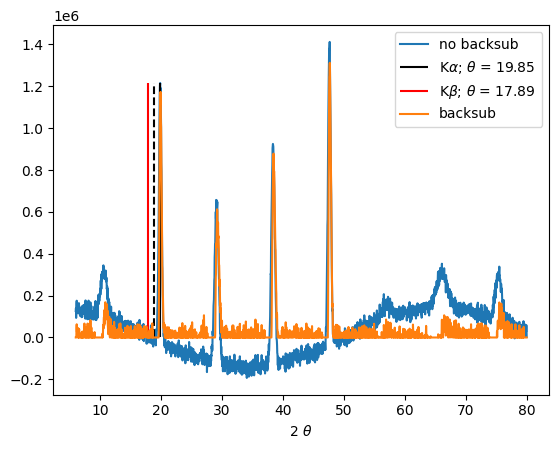

In [12]:
def test_backsub():

    data = xrd.Data("D:/DATA/Kaggle dataset/powerxrd-main/synthetic-data/sample1.xy").importfile()
    plt.plot(*data,label='no backsub')

    chart = xrd.Chart(*data)
    chart.emission_lines(xrange_Ka=[10,20], show=True)
    plt.plot(*chart.backsub(),label='backsub')
    plt.xlabel('2 $\\theta$')
    plt.legend()
    plt.show()

    # plt.plot(*xrd.Chart(*xrd.Data('sample1.xy').importfile()).backsub())
    # plt.show()

test_backsub()

## Multiple Plots in One Chart
Multiple plots of background subtracted data can also be made and overlaid in a chart with matplotlib's `plt.subplot` method. Here `importfile('csv')` from `xrd.Data` is used to process comma-separated value (.csv) files.

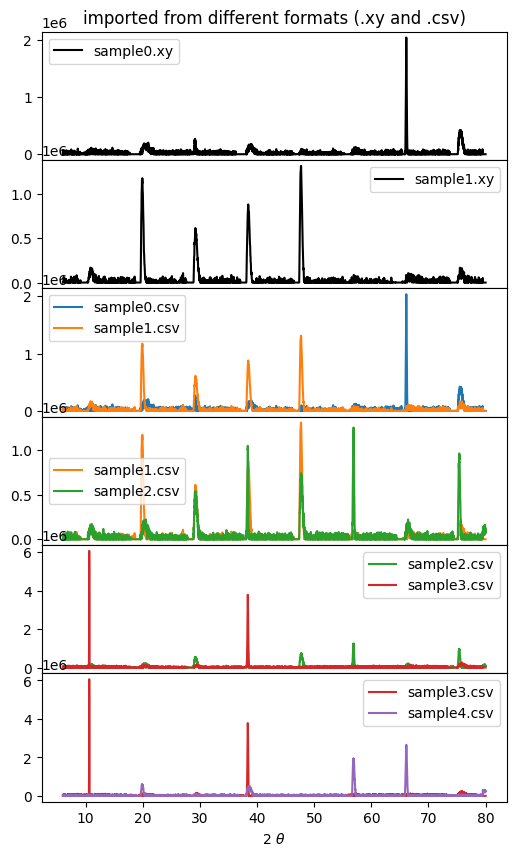

In [15]:
def test_backsub_multiplt():


    fig, axs = plt.subplots(6, 1, figsize=(6,10), sharex=True)
    fig.subplots_adjust(hspace=0)

    # xrd.Data import tab-separated files (.xy) file witn importfile()
    for i in range(2):
        data = xrd.Data('D:/DATA/Kaggle dataset/powerxrd-main/synthetic-data/sample{}.xy'.format(i)).importfile()
        chart = xrd.Chart(*data)
        axs[i].plot(*chart.backsub(),color='k',label='sample{}.xy'.format(i))
        axs[i].legend()


    # xrd.Data can now also import csv file with .importfile('csv') option
    for j in range(2):
        for i in range(1,5):
            data = xrd.Data('D:/DATA/Kaggle dataset/powerxrd-main/synthetic-data/sample{}.csv'.format(i+j-1)).importfile()
            chart = xrd.Chart(*data)
            axs[i+1].plot(*chart.backsub(),color='C'+str(i+j-1),label='sample{}.csv'.format(i+j-1))
            axs[i+1].legend()


    plt.xlabel('2 $\\theta$')
    # plt.suptitle('*all plots below are from synthetic data (i.e. not real XRD)')
    axs[0].set_title('imported from different formats (.xy and .csv)')
    plt.show()

test_backsub_multiplt()

# Crystallite Size - Peak Calculations



## Single Peak

The `SchPeak` method from the `xrd.Chart` class is used to calculate the Scherrer length of the peak in the 2$\theta$ range `xrange` of 18 to 22. The `show` kwarg of this method is set to `True` to run the plot processing information to plot the highlighted peak (magenta) and the Gaussian fit of the peak (dashed cyan). `SchPeak` also outputs all the fitting information used to calculate the crystallite size with the Scherrer equation.


-Gaussian fit results-
y-shift 10071.344336578455
amplitude 498186.5037631876
mean 19.921493157194636
sigma 0.16929137213593876
covariance matrix 
[[ 2.20553362e+07 -1.98537381e+07  3.77920427e-07 -4.49772441e+00]
 [-1.98537381e+07  7.90011520e+07 -3.09325436e-07  1.78971557e+01]
 [ 3.77920427e-07 -3.09325436e-07  9.41177385e-06 -8.30816551e-12]
 [-4.49772441e+00  1.78971557e+01 -8.30816551e-12  1.03289910e-05]]

SchPeak: Scherrer width calc. for peak in range of [18,22]

FWHM == sigma*2*sqrt(2*ln(2)): 0.3986507165565025 degrees
K (shape factor): 0.9
K-alpha: 0.15406 nm 
max 2-theta: 19.91162984576907 degrees

SCHERRER WIDTH: 20.23261910061378 nm


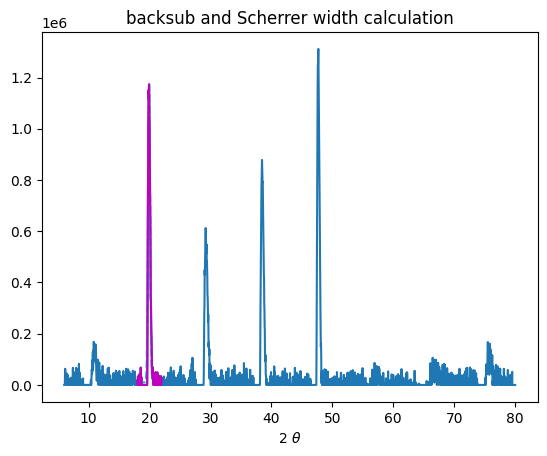

In [16]:
def test_sch():

    data = xrd.Data('D:/DATA/Kaggle dataset/powerxrd-main/synthetic-data/sample1.xy').importfile()
    chart = xrd.Chart(*data)

    chart.backsub(tol=1.0,show=True)
    chart.SchPeak(xrange=[18,22],verbose=True,show=True)
    plt.xlabel('2 $\\theta$')
    plt.title('backsub and Scherrer width calculation')
    plt.show()

test_sch()

## Multiple Peaks (Automated)

The `allpeaks` method from the `xrd.Chart` class is used to automate the calculation for all peaks present [within a certain peak height tolerance] in the XRD spectrum. This method calls the `SchPeak` multiple times and finds peak maxima through a recursion algorithm which crops the ranges to find local maxima from left to right recursively.

`allpeaks` takes 2 kwargs: The first one is `tols`, where `tols[0]` (default=0.2) is the threshold of the height required for a peak to be considered for the Scherrer calculation, and `tols[1]` (default = 0.8) is the "guessed" average half-width distance from the top of every peak to one of their tails.


-------------------------------------------
ALLPEAKS: Automated Scherrer width calculations with a recursive search of local maxima

local_max -- max x: 47.704043351396415 max y: 1311776.3933334802


local_max -- max x: 47.704043351396415 max y: 1311776.3933334802
local_max -- max x: 19.91162984576907 max y: 1173162.1712873918
local_max -- max x: 10.842851187995 max y: 168253.24331045512
local_max -- max x: 8.406002501042101 max y: 82154.38375744826
local_max -- max x: 12.292621925802418 max y: 74441.86925361764
local_max -- max x: 38.45018757815757 max y: 878296.1296163809
local_max -- max x: 29.19633180491872 max y: 612236.4986085768
local_max -- max x: 27.037098791162983 max y: 106100.29651133435
local_max -- max x: 35.488953730721136 max y: 85476.80399923288
local_max -- max x: 40.45518966235932 max y: 72528.3080639828
local_max -- max x: 75.52730304293456 max y: 167210.87548438687
local_max -- max x: 66.45852438516049 max y: 106019.89694947231
local_max -- max x: 76.8536890370987

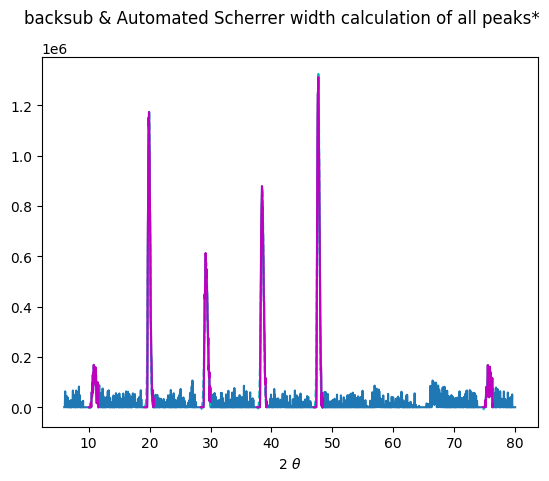

In [17]:
def test_allpeaks():

    data = xrd.Data('D:/DATA/Kaggle dataset/powerxrd-main/synthetic-data/sample1.csv').importfile()
    chart = xrd.Chart(*data)

    chart.backsub(tol=1,show=True)
    chart.allpeaks(tols=(0.1,0.8), verbose=False, show=True)
    plt.xlabel('2 $\\theta$')
    plt.suptitle('backsub & Automated Scherrer width calculation of all peaks*')
    plt.show()

test_allpeaks()

# Noise Reduction through a Running Average

The `mav` method from the `xrd.Data` class outputs the x,y data made from a running "n" point average of the original data. Below, you'll see `backsub` is used in combination with `mav` to render the plot. `mav` should be used with care as the operation may result in a substantial loss of resolution.

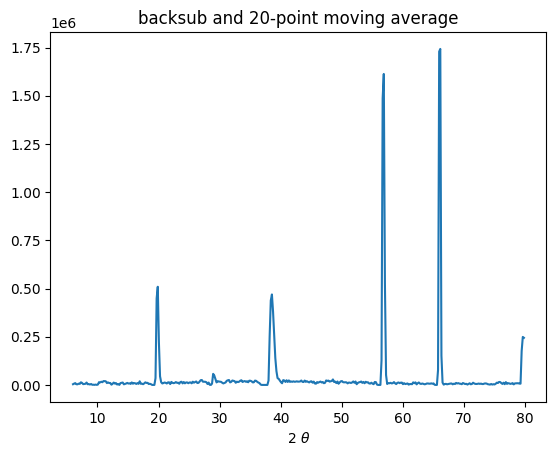

In [18]:
def test_mav():

    data = xrd.Data('D:/DATA/Kaggle dataset/powerxrd-main/synthetic-data/sample4.csv').importfile()
    chart = xrd.Chart(*data)

    chart.backsub()
    n = 20
    plt.plot(*chart.mav(n))
    plt.xlabel('2 $\\theta$')
    plt.title('backsub and {}-point moving average'.format(n))
    plt.show()

test_mav()